# Gambler's Problem: Solving Problem 4.9 from Sutton and Barto #

## Problem Description

The gambler's problem involves a gambler who bets on the outcomes of a sequence of coin flips. The game has the following rules:

If the coin lands heads, the gambler wins an amount equal to their stake.

If the coin lands tails, the gambler loses their stake.

The game ends either when the gambler reaches their goal of $100 or runs out of money.

On each flip, the gambler decides how much to stake, with the allowable stakes being integers between $1$ and the minimum of the gambler's current capital and $100 - \text{capital}$.

The goal is to maximize the probability of reaching $100.



*Sutton and Barto said:*

Implement __value iteration__ for the gambler’s problem and
solve it for $p_h = 0.25$ and $ph = 0.55$. 

In programming, you may find it convenient to
introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3.
Are your results stable as $\theta \to 0$?


 We will iteratively update $V(s)$ using the Bellman equation:
   $$
   V(s) = \max_a \left[ p_h \cdot V(s+a) + (1 - p_h) \cdot V(s-a) \right]
   $$
 Then update the policy after convergence by choosing the action $a$ that maximizes $V(s)$.

In [115]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
def val_iter(ph, theta=1e-7):
    #ph => probability of heads
    #we will iterate until value function changes by atmost theta
    V= np.zeros(101) #states go from 0 to 100
    policy=np.zeros(101,dtype=int)
    reward=np.zeros(101)
    reward[100]=1
    states=np.arange(1,100)  # not including terminal states here
    term_states=[0,100]
    iter=0


    while True: 
        change=0
        for state in states:  # for a given state
            best_avalue=-np.inf
            best_action=0

            for action in range(1,min(state,100-state)+1):  #check every action 
                win=state+action
                loss=state-action
                a_val=(ph*(V[win]+reward[win])+(1-ph)*(V[loss]+reward[loss])) #get the action value
                if(a_val>best_avalue):
                    best_avalue=a_val
                    best_action=action  # get the best action value over all actions
            
            change=max(change, abs(V[state]-best_avalue)) #the highest change in value that occurs over all state
            V[state]= best_avalue  #update the value, of course
            policy[state]=best_action
        iter+=1
        if change<theta:   #check if values have converged
            break
    return V, policy,iter



In [117]:
def plot_results(V, policy, ph):
    
    #Plot the value function and policy.
    plt.figure(figsize=(14, 6))

    # Plot value function
    plt.subplot(1, 2, 1)
    plt.plot(range(101), V, marker='o', color='orange')
    plt.title(f'Value Function (p_h = {ph})')
    plt.xlabel('Capital')
    plt.ylabel('Value Estimates')

    # Plot policy
    plt.subplot(1, 2, 2)
    plt.bar(range(101), policy, width=0.9, color='skyblue', edgecolor='black')
    plt.title(f'Policy (p_h = {ph})')
    plt.xlabel('Capital')
    plt.ylabel('Stake')
    if(ph>0.5):
        plt.ylim(0,10)

    plt.tight_layout()
    plt.show()

In [118]:
def gamble():
    for ph in [0.25, 0.55]:
        V, Policy,iter = val_iter(ph)
        V[100]=1 #we are already at 100 when stake=100
        print(Policy)
        print(f"This took {iter} iterations")
        plot_results(V, Policy, ph)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 12 11 10  9  8  7  6  5  4  3  2
  1 25  1  2  3  4  5  6  7  8  9 10 11 12 12 11 10  9  8  7  6  5  4  3
  2  1 50  1  2  3  4  5  6  7  8  9 10 11 12 12 11 10  9  8  7  6  5  4
  3  2  1 25  1  2  3  4  5  6  7  8  9 10 11 12 12 11 10  9  8  7  6  5
  4  3  2  1  0]
This took 12 iterations


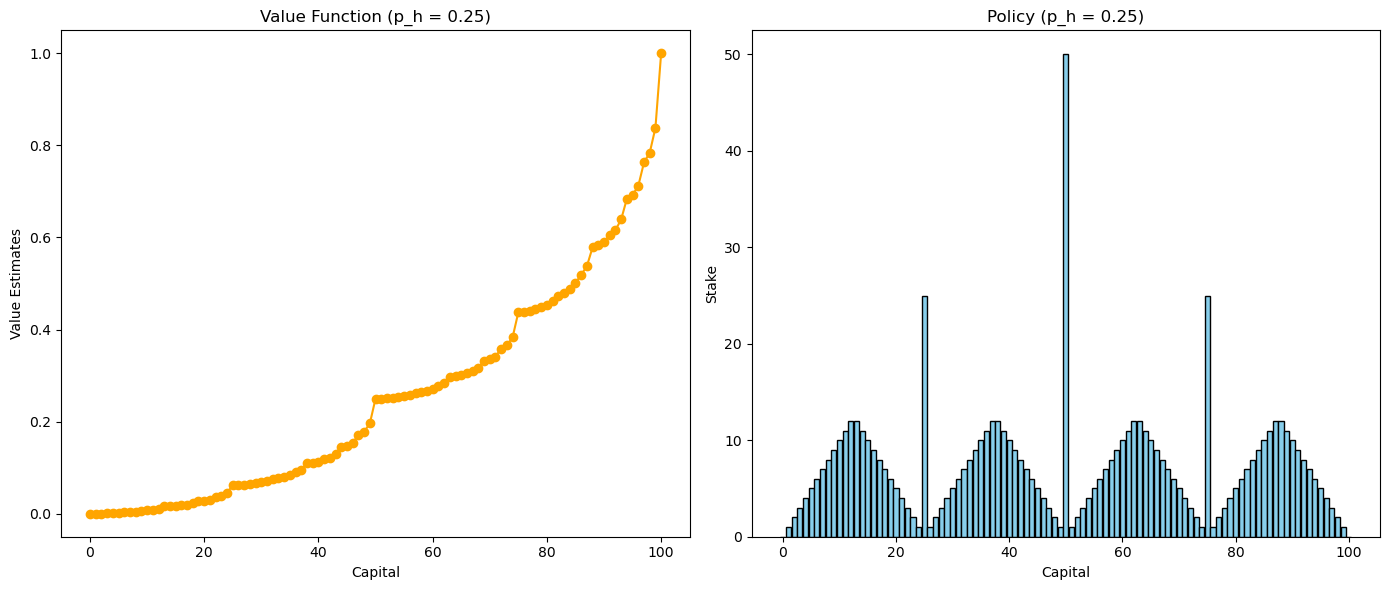

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
This took 1204 iterations


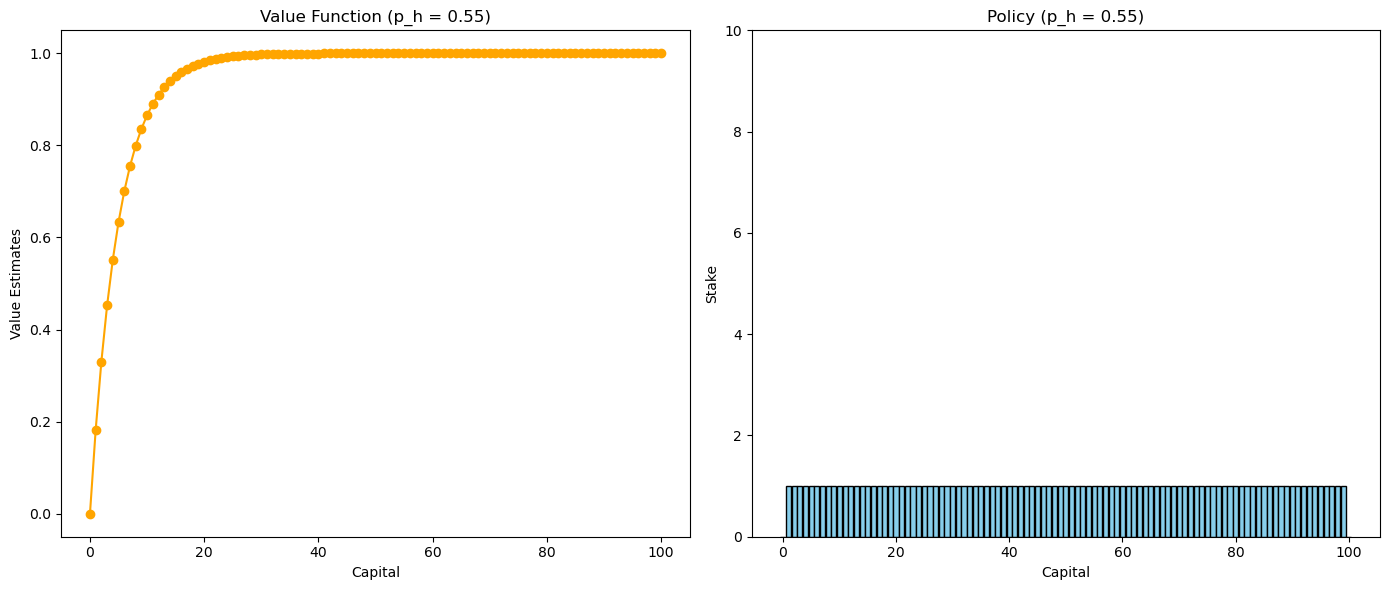

In [119]:
gamble()